In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
import re

In [2]:
import json
#import csv to pd
data = json.load(open('final2.json', 'r', encoding='utf-8'))

df = pd.DataFrame(data)

In [3]:
df['table'][0][0]

C:\Users\Jake\AppData\Local\Temp\ipykernel_6692\2984923568.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['table'][0][0]


'<table>\n<colgroup>\n<col>\n<col>\n<col>\n<col>\n</colgroup>\n<thead>\n<tr>\n<th>매출유형</th>\n<th>품 목</th>\n<th>매출액</th>\n<th>비 중(%)</th>\n</tr>\n</thead>\n<tbody>\n<tr>\n<td>방송공연</td>\n<td>방송출연, 콘서트, 각종행사등</td>\n<td>5,375</td>\n<td>46.42</td>\n</tr>\n<tr>\n<td>공연,기획</td>\n<td>당사, 타사의 콘서트의 기획,진행등</td>\n<td>6,189</td>\n<td>53.45</td>\n</tr>\n<tr>\n<td>기 타</td>\n<td>영상제작등</td>\n<td>15</td>\n<td>0.13</td>\n</tr>\n<tr>\n<td>합  계</td>\n<td>11,579</td>\n<td>100</td>\n</tr>\n</tbody>\n</table>\n'

In [10]:
for i, tables in enumerate(df['table']):
    # Parse the HTML content
    for j, table in enumerate(tables):
        soup = BeautifulSoup(table, 'html.parser')
        
        # Find all <tr> and <td> tags and remove child tags while keeping their content
        for tag in soup.find_all(['tr', 'td']):
            for child in tag.find_all(['span', 'p', 'div']):
                child.unwrap()  # Remove the tag but keep the content
        table = str(soup)
        df['table'][i][j] = table
    # Replace the original table in the DataFrame with the modified HTML

C:\Users\Jake\AppData\Local\Temp\ipykernel_6692\1477104933.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['table'][i][j] = table
C:\Users\Jake\AppData\Local\Temp\ipykernel_6692\1477104933.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(table, 'html.parser')


In [11]:
df['table'][2][0]

C:\Users\Jake\AppData\Local\Temp\ipykernel_6692\2433996608.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['table'][2][0]


'<table>\n<colgroup>\n<col/>\n<col/>\n</colgroup>\n<tbody>\n<tr>\n<td>\n용 어\n\n<br/>\n\n</td>\n<td>\n설 명\n\n<br/>\n\n</td>\n</tr>\n<tr>\n<td>\n&lt;\n제품 관련&gt;\n\n<br/>\n\n</td>\n</tr>\n<tr>\n<td>\n올인원 생체현미경\n\n<br/>\n\n</td>\n<td>\n기존 생체현미경 솔루션 한계를 극복하여 고품질의 생체현미경 영상을 살아있는 동물 내부의 다양한 장기와 조직에서 자유롭게 획득할 수 있도록 요구되는 핵심 요소기술과 필수적인 기능들이 모두 통합된 생체현미경\n<br/>\n\n</td>\n</tr>\n<tr>\n<td>\nIVM-C\n<br/>\n\n</td>\n<td>\n제품명으로 당사의1세대 공초점 현미경\n<br/>\n\n</td>\n</tr>\n<tr>\n<td>\nIVM-C2\n<br/>\n\n</td>\n<td>\n제품명으로 당사의2세대 공초점 현미경\n<br/>\n\n</td>\n</tr>\n<tr>\n<td>\nIVM-C3\n<br/>\n\n</td>\n<td>\n제품명으로 당사의3세대 공초점 현미경\n<br/>\n\n</td>\n</tr>\n<tr>\n<td>\nIVM-CM\n<br/>\n\n</td>\n<td>\n제품명으로 당사의1세대 공초점 이광자 현미경\n<br/>\n\n</td>\n</tr>\n<tr>\n<td>\nIVM-CM2\n<br/>\n\n</td>\n<td>\n제품명으로 당사의2세대 공초점 이광자 현미경\n<br/>\n\n</td>\n</tr>\n<tr>\n<td>\nIVM-CM3\n<br/>\n\n</td>\n<td>\n제품명으로 당사의3세대 공초점 이광자 현미경\n<br/>\n\n</td>\n</tr>\n<tr>\n<td>\nIVM-MS\n<br/>\n\n</td>\n<td>\n제품명으로 당사의1세대 이광자 현미경(레이저 파장 비가변형)\n<br/>\n\n</td>\n</

In [12]:
df

,text,table
0,II. 사업의 내용\n1. 사업의 개요\n회사가 영위하고 있는 사업부문은 엔터테인먼...,[<table>\n<colgroup>\n<col/>\n<col/>\n<col/>\n...
1,"II. 사업의 내용\n1. 사업의 개요\n당사는 2000년 이방성전도필름 (ACF,...",[(단위 : 천원)\n<table>\n<colgroup>\n<col/>\n<col/...
2,"II. 사업의 내용\n1. 사업의 개요\n당사의 사업의 개요에 앞서, 전문용어와 축...",[<table>\n<colgroup>\n<col/>\n<col/>\n</colgro...
3,II. 사업의 내용\n1. 사업의 개요\n당사는1997년 창사이래로(법인전환2003...,[]
4,II. 사업의 내용\n1. 사업의 개요\n당사는 첨단바이오의약품의 핵심 소재인 세포...,[]
...,...,...
2680,"II. 사업의 내용\n1. 사업의 개요\n당사는 의약품, 화학약품, 공업약품, 수의...",[]
2681,II. 사업의 내용\n1. 사업의 개요\n가. 사업부문별 종속회사 현황 (요약)\n...,[(단위 : 사)\n<table>\n<colgroup>\n<col/>\n<col/>...
2682,"II. 사업의 내용\n1. 사업의 개요\n당사는 각종 사류, 직물류의 생산, 판매를...",[<table>\n<colgroup>\n<col/>\n<col/>\n</colgro...
2683,II. 사업의 내용\n※ 예측정보에 대한 주의사항당사가 동 보고서에서 미래에 발생할...,[<table>\n<colgroup>\n<col/>\n<col/>\n<col/>\n...


In [30]:
df.to_csv('final.csv', index=False)

In [24]:
lens = []
for row in df.itertuples():
        if row.table!= []:
            for table in row.table:
                    lens.append(len(table))



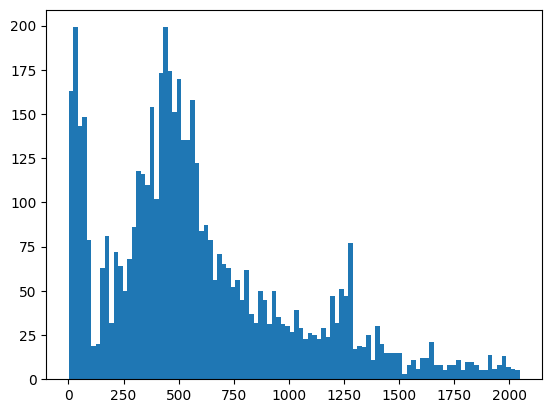

231
5518


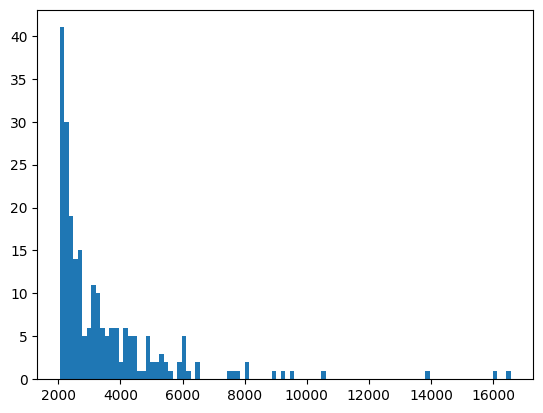

In [29]:
# hist lens under 2048
lens1 = [l for l in lens if l < 2048]
import matplotlib.pyplot as plt
plt.hist(lens1, bins=100)
plt.show()

# hist lens over 2048
lens2 = [l for l in lens if l >= 2048]
import matplotlib.pyplot as plt
plt.hist(lens2, bins=100)
#sum of lens count over 2048
print(sum([l >= 2048 for l in lens]))
print(len(lens))


